In [1]:
import pandas as pd
import geopandas as gpd
import momepy as mm
import matplotlib.pyplot as plt

In [2]:
# read building parts
parts = gpd.read_file("parts_edificis.geojson")
parts.head()

,uid,geometry
0,1,"POLYGON ((428142.110 4574883.978, 428197.436 4..."
1,2,"POLYGON ((428248.996 4574991.966, 428244.816 4..."
2,3,"POLYGON ((427453.094 4574959.376, 427436.067 4..."
3,4,"POLYGON ((428292.690 4575273.840, 428284.720 4..."
4,5,"POLYGON ((428128.043 4575225.442, 428129.635 4..."


In [3]:
# download limits of municipality
limit = gpd.read_file("0301100100_UNITATS_ADM_POLIGONS.json")
limit = limit.dissolve()
limit

,geometry,FID,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,...,AREA,CODI_UA,TIPUS_UA,NOM,WEB1,WEB2,WEB3,FHEX_COLOR,Shape_Leng,Shape_Area
0,"MULTIPOLYGON (((430993.770 4577914.040, 430994...",0,01,Grup - I,0104,Unitats Administratives,010411,Terme Municipal,01041101,Terme Municipal,...,1.017050e+08,080193,TERME,Barcelona,http://www.bcn.cat,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/document...,#000000,114036.624503,1.017050e+08


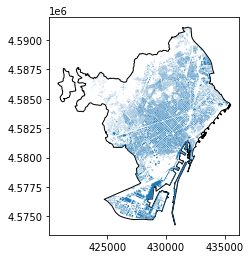

In [4]:
f, ax = plt.subplots()
limit.plot(ax=ax, color = "None")
parts.plot(ax=ax)
plt.show()

In [5]:
# generate tesellations with limit
tes = mm.Tessellation(parts, unique_id = "uid", limit = limit, segment = 2)


Inward offset...
Generating input point array...
Generating Voronoi diagram...
Generating GeoDataFrame...
Dissolving Voronoi polygons...


/opt/conda/lib/python3.9/site-packages/momepy/elements.py:383: UserWarning: Tessellation does not fully match buildings. 60 element(s) collapsed during generation - unique_id: {1031, 2568, 5646, 1555, 7188, 1058, 1060, 1061, 1062, 4391, 18485, 14410, 1382, 1383, 1386, 4216, 4808, 1920, 4809, 4488, 4810, 652, 653, 654, 11408, 19345, 11934, 17823, 693, 694, 699, 700, 701, 702, 712, 1225, 714, 715, 716, 1226, 1227, 1228, 720, 721, 1233, 4557, 4811, 16592, 1499, 1500, 1501, 1502, 998, 4840, 12011, 12012, 2541, 1008, 1009, 9209}
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/momepy/elements.py:394: UserWarning: Tessellation contains MultiPolygon elements. Initial objects should be edited. unique_id of affected elements: [7880, 2358, 8596, 9006, 9149, 12439, 12440, 11966, 11820, 11970, 11967, 11588, 11587, 11606, 12109, 13012, 10302]
  warnings.warn(


In [6]:
tes.tessellation.head()

,uid,geometry
1726,1763,"POLYGON ((427108.503 4574812.351, 427110.815 4..."
1591,1628,"POLYGON ((425661.186 4575762.504, 425663.017 4..."
1602,1639,"POLYGON ((425497.709 4575760.382, 425499.349 4..."
1609,1646,"POLYGON ((425535.095 4575825.894, 425534.114 4..."
1612,1649,"POLYGON ((425513.973 4575963.108, 425511.280 4..."


In [7]:
# convert to geodataframe
tes_gdf = tes.tessellation

<AxesSubplot:>

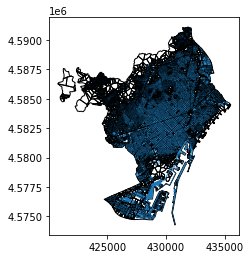

In [8]:
f, ax = plt.subplots()
tes_gdf.plot(ax=ax, color = "None")
parts.plot(ax=ax)

In [9]:
# create space outside of buildings
tes_gdf_dif = gpd.overlay(tes_gdf, parts, how = "difference")
tes_gdf_dif

,uid,geometry
0,1763,"POLYGON ((427110.815 4574819.804, 427113.095 4..."
1,1628,"POLYGON ((425663.017 4575763.855, 425664.726 4..."
2,1639,"POLYGON ((425499.349 4575762.691, 425500.965 4..."
3,1646,"POLYGON ((425534.114 4575823.741, 425529.689 4..."
4,1649,"POLYGON ((425511.280 4575963.410, 425490.290 4..."
...,...,...
19629,19330,"POLYGON ((431564.651 4590935.975, 431573.902 4..."
19630,19331,"POLYGON ((431598.250 4590961.658, 431598.527 4..."
19631,19332,"POLYGON ((431611.074 4590970.434, 431609.914 4..."
19632,19329,"POLYGON ((431578.952 4590950.724, 431577.324 4..."


<AxesSubplot:>

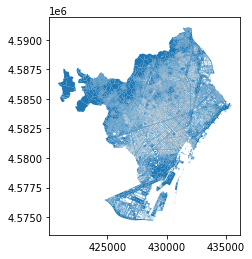

In [10]:
tes_gdf_dif.plot()

In [11]:
tes_gdf_dif.to_file("tessellation_nobuilding_limit.geojson", driver = "GeoJSON")

In [12]:
# read driving network - this was previously downloaded for another project with osmnx
cs = gpd.read_file("carrers_bcn.gpkg", layer = "edges")
cs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
cs = cs.to_crs(parts.crs)
cs.head()

,u,v,key,osmid,oneway,lanes,name,highway,maxspeed,length,from,to,access,tunnel,ref,width,junction,est_width,bridge,geometry
0,21638845,885308258,0,554707785,True,2,Passeig de Joan de Borbó,residential,30,28.335,21638845,885308258,,,,,,,,"LINESTRING (432071.186 4580160.408, 432067.928..."
1,21638845,21638855,0,"[4079500, 543357596, 902517725, 423227070]",False,"['4', '3']",Passeig de Joan de Borbó,residential,30,560.533,21638855,21638845,,,,,,,,"LINESTRING (432167.223 4580702.446, 432162.626..."
2,21638845,885308314,0,554707788,True,2,Passeig de Joan de Borbó,residential,30,31.275,885308314,21638845,,,,,,,,"LINESTRING (432087.076 4580133.490, 432071.186..."
3,21638855,3643929105,0,"[997213890, 423227071]",True,2,Passeig de Joan de Borbó,residential,30,50.715,21638855,3643929105,,,,,,,,"LINESTRING (432167.223 4580702.446, 432173.962..."
4,21638855,3643929098,0,359735827,True,2,Passeig de Joan de Borbó,residential,30,48.934,3643929098,21638855,,,,,,,,"LINESTRING (432170.598 4580751.177, 432170.106..."


In [14]:
# generate tesellations with limit
enc = mm.enclosures(cs, limit = limit)
enc

,eID,geometry
0,0,"POLYGON ((432067.928 4580132.304, 432071.186 4..."
1,1,"POLYGON ((432167.223 4580702.446, 432173.962 4..."
2,2,"POLYGON ((432178.095 4580751.629, 432176.797 4..."
3,3,"POLYGON ((432169.436 4580762.935, 432169.376 4..."
4,4,"POLYGON ((432157.167 4580854.015, 432137.270 4..."
...,...,...
5571,5571,"POLYGON ((430230.821 4587436.190, 430229.722 4..."
5572,5572,"POLYGON ((427960.790 4577260.774, 427958.796 4..."
5573,5573,"POLYGON ((427344.731 4575765.253, 427343.018 4..."
5574,5574,"POLYGON ((430993.770 4577914.040, 430994.160 4..."


In [16]:
# generate tessellations with enclosures
tes_enc = mm.Tessellation(parts, unique_id = "uid", enclosures = enc, segment = 2)
tes_enc.tessellation

,uid,geometry,eID,uID
0,3,"POLYGON ((432215.092 4580763.762, 432216.196 4...",1,NaN
1,11584,"POLYGON ((431911.690 4579623.064, 431909.279 4...",1,NaN
2,11578,"POLYGON ((431939.484 4579706.879, 431939.124 4...",1,NaN
3,11585,"POLYGON ((431910.466 4579941.074, 431909.525 4...",1,NaN
4,11521,"POLYGON ((432240.100 4579923.189, 432240.093 4...",1,NaN
...,...,...,...,...
21670,NaN,"POLYGON ((423923.592 4586741.356, 423917.760 4...",5569,NaN
21671,NaN,"POLYGON ((433087.544 4586060.877, 433093.455 4...",5570,NaN
21672,NaN,"POLYGON ((430230.821 4587436.190, 430229.722 4...",5571,NaN
21673,NaN,"POLYGON ((427960.790 4577260.774, 427958.796 4...",5572,NaN


In [17]:
tes_enc_gdf = tes_enc.tessellation

<AxesSubplot:>

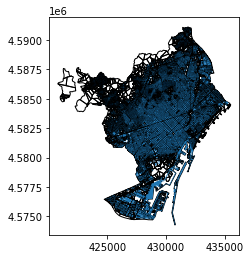

In [18]:
f, ax = plt.subplots()
tes_enc_gdf.plot(ax=ax, color = "None")
parts.plot(ax=ax)

In [19]:
tes_enc_gdf_dif = gpd.overlay(tes_enc_gdf, parts, how = "difference")
tes_gdf_dif

,uid,geometry
0,1763,"POLYGON ((427110.815 4574819.804, 427113.095 4..."
1,1628,"POLYGON ((425663.017 4575763.855, 425664.726 4..."
2,1639,"POLYGON ((425499.349 4575762.691, 425500.965 4..."
3,1646,"POLYGON ((425534.114 4575823.741, 425529.689 4..."
4,1649,"POLYGON ((425511.280 4575963.410, 425490.290 4..."
...,...,...
19629,19330,"POLYGON ((431564.651 4590935.975, 431573.902 4..."
19630,19331,"POLYGON ((431598.250 4590961.658, 431598.527 4..."
19631,19332,"POLYGON ((431611.074 4590970.434, 431609.914 4..."
19632,19329,"POLYGON ((431578.952 4590950.724, 431577.324 4..."


<AxesSubplot:>

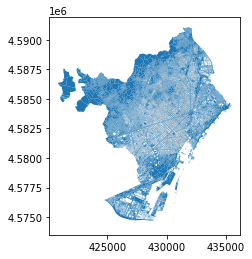

In [20]:
tes_enc_gdf_dif.plot()

In [21]:
tes_enc_gdf_dif.to_file("tessellation_nobuilding_enclosures.geojson", driver = "GeoJSON")

<AxesSubplot:>

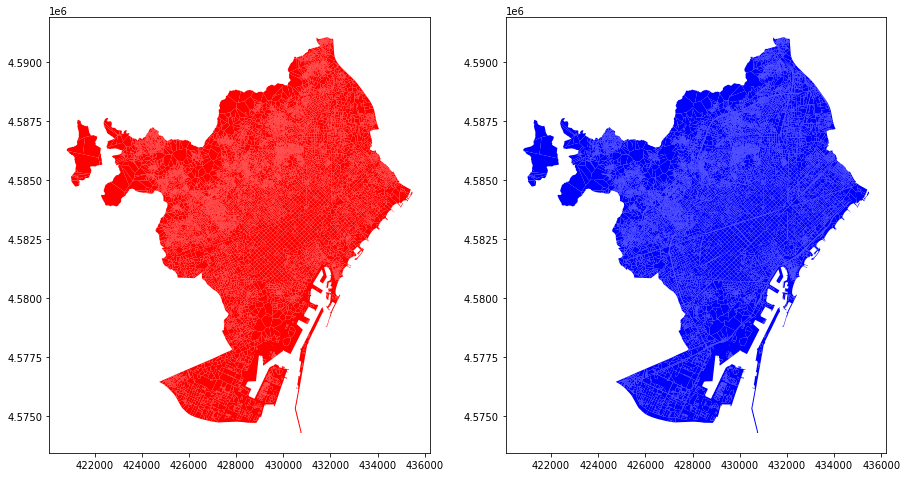

In [26]:
f, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,15))
tes_gdf.plot(ax=ax[0], color = "red")
tes_enc_gdf.plot(ax=ax[1], color = "blue")

In [27]:
tes_gdf.describe()

,uid
count,19634.000000
mean,9865.298105
std,5678.014879
min,1.000000
25%,4957.250000
50%,9868.500000
75%,14781.750000
max,19694.000000


In [28]:
tes_enc_gdf.describe()

,eID,uID
count,21675.000000,1792.000000
mean,2765.318108,8387.369420
std,1576.346926,5871.867685
min,0.000000,3.000000
25%,1404.000000,3786.750000
50%,3006.000000,5522.500000
75%,4090.000000,13103.250000
max,5575.000000,19623.000000


In [29]:
tes_gdf.to_file("tessellation_limit.geojson", driver = "GeoJSON")
tes_enc_gdf.to_file("tessellation_enclosure.geojson", driver = "GeoJSON")

In [30]:
tes_enc_gdf

,uid,geometry,eID,uID
0,3,"POLYGON ((432215.092 4580763.762, 432216.196 4...",1,NaN
1,11584,"POLYGON ((431911.690 4579623.064, 431909.279 4...",1,NaN
2,11578,"POLYGON ((431939.484 4579706.879, 431939.124 4...",1,NaN
3,11585,"POLYGON ((431910.466 4579941.074, 431909.525 4...",1,NaN
4,11521,"POLYGON ((432240.100 4579923.189, 432240.093 4...",1,NaN
...,...,...,...,...
21670,NaN,"POLYGON ((423923.592 4586741.356, 423917.760 4...",5569,NaN
21671,NaN,"POLYGON ((433087.544 4586060.877, 433093.455 4...",5570,NaN
21672,NaN,"POLYGON ((430230.821 4587436.190, 430229.722 4...",5571,NaN
21673,NaN,"POLYGON ((427960.790 4577260.774, 427958.796 4...",5572,NaN


In [32]:
tes_gdf

,uid,geometry
1726,1763,"POLYGON ((427108.503 4574812.351, 427110.815 4..."
1591,1628,"POLYGON ((425661.186 4575762.504, 425663.017 4..."
1602,1639,"POLYGON ((425497.709 4575760.382, 425499.349 4..."
1609,1646,"POLYGON ((425535.095 4575825.894, 425534.114 4..."
1612,1649,"POLYGON ((425513.973 4575963.108, 425511.280 4..."
...,...,...
19271,19330,"POLYGON ((431566.078 4590935.901, 431564.651 4..."
19272,19331,"POLYGON ((431595.700 4590959.585, 431598.250 4..."
19273,19332,"POLYGON ((431611.431 4590971.927, 431611.074 4..."
19270,19329,"POLYGON ((431579.081 4590950.925, 431578.952 4..."
